### **1. Import dataset, tools and descriptors**

In [1]:
# Import tools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import std, mean
import scipy.stats as stats
from scipy.stats import normaltest
from scipy.stats import mannwhitneyu
from scipy.stats import kurtosis
from scipy.stats import skew

# Import feature selection algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold

# Import Classifiers
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

# Data splitting
from sklearn.model_selection import train_test_split

# Cross-validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Model performance
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

# Model performance metric
from sklearn.metrics import make_scorer

# PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [2]:
! pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! pip install padelpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 78.0 MB/s 


In [4]:
! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

--2022-11-03 23:32:51--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2022-11-03 23:32:51--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2022-11-03 23:32:51 (50.4 MB/s) - ‘fingerprints_xml.zip’ saved [10871/10871]

Archive:  fingerprints_xm

In [5]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

fp = dict(zip(FP_list, xml_files))

In [17]:
url = pd.read_csv('https://raw.githubusercontent.com/GitGears/AR/main/AR1678.csv')
df = url.sort_values(by='ID', ascending=True)
df

,ID,SMILES,pIC50,bioactivity,bioactivity1,TARGET,ASSAY_DESCRIPTION,YEAR
0,CHEMBL101907,CC1=CC(C)(C)Nc2ccc3c(c21)C(c1cc(C)cc(Br)c1)Oc1...,5.91,group4-ia,ia,Androgen Receptor,Antagonistic activity was determined in Human ...,1998
1,CHEMBL101914,CC1=CC(C)(C)Nc2ccc3c(c21)C(c1ccccc1)Oc1ccccc1-3,6.13,group3-int,int,Androgen Receptor,Antagonistic activity was determined in Human ...,1998
2,CHEMBL102403,CC1=CC(C)(C)Nc2ccc3c(c21)C(c1ccc(C)cc1)Oc1cccc...,5.91,group4-ia,ia,Androgen Receptor,Antagonistic activity was determined in Human ...,1998
3,CHEMBL102541,CC1=CC(C)(C)Nc2ccc3c(c21)C(c1cc(Cl)cc(Cl)c1)Oc...,5.96,group4-ia,ia,Androgen Receptor,Antagonistic activity was determined in Human ...,1998
4,CHEMBL102720,CC1=CC(C)(C)Nc2ccc3c(c21)C(c1ccc(Cl)c(C)c1)Oc1...,5.85,group4-ia,ia,Androgen Receptor,Antagonistic activity was determined in Human ...,1998
...,...,...,...,...,...,...,...,...
1673,CHEMBL7373,CC[C@@H]1C[C@H](C)c2cc3c(C(F)(F)F)cc(O)nc3cc2N1,6.86,group3-int,int,Androgen Receptor,Antagonistic activity against human androgen r...,1999
1674,CHEMBL7455,CC[C@H]1Nc2cc3nc(O)cc(C(F)(F)F)c3cc2C[C@@H]1C,7.96,group2-a,a,Androgen Receptor,Antagonistic activity against human androgen r...,1999
1675,CHEMBL75897,O=C1CC(c2ccccc2O)Oc2ccccc21,5.19,group4-ia,ia,Androgen Receptor,Antagonist activity at AR in human LNCAP cells...,2018
1676,CHEMBL806,CC(C)C(=O)Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1,5.70,group4-ia,ia,Androgen Receptor,Antiandrogenic activity in human MDA-MB-453 ce...,2009


In [18]:
# PubChem
descriptors = pd.read_csv('https://raw.githubusercontent.com/GitGears/AR/main/AR1678-pc.csv')
df_pc=descriptors.sort_values(by='Name', ascending=True)

In [19]:
X_raw=df_pc.drop('Name', axis=1)
Y_raw= df['bioactivity']

### **2. Feature selection**

In [20]:
# remove low variance features

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X_lowvariance = remove_low_variance(X_raw, threshold=0.1)
X_lowvariance

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,...,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP840,PubchemFP860,PubchemFP861
1,1,1,1,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,0,0,0
0,1,1,1,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,1,1,1,1,0,0,0,1,1,0,...,1,1,0,0,0,0,1,0,0,0
1674,1,1,1,1,0,0,0,1,1,0,...,1,1,0,0,0,0,1,0,0,0
1675,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1676,0,0,1,1,0,1,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0


In [21]:
# remove high collinerated features

corr_matrix = X_lowvariance.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

X_corr = X_lowvariance.drop(X_lowvariance[to_drop], axis=1)
X_corr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,...,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP840,PubchemFP860
1,1,1,1,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,1,0,0
0,1,1,1,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,1,0,0
2,1,1,1,0,0,0,0,0,0,0,...,1,1,1,0,1,0,1,1,0,0
3,1,1,1,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,1,0,0
4,1,1,1,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,1,1,1,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
1674,1,1,1,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
1675,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1676,0,0,1,1,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


### **3.Data balancing**

In [22]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy="not majority",random_state=42)

X_res, Y_res = ros.fit_resample(X_corr, Y_raw)

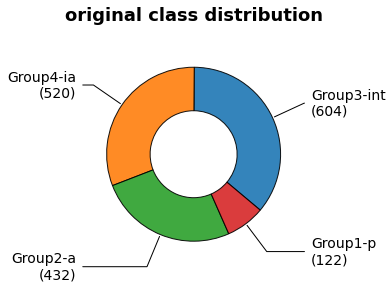

In [23]:
# EDA for Y

fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(aspect="equal"))

bioactivity_class_value = Y_raw.value_counts()
bioactivity_class_label = [i.capitalize() for i in Y_raw.value_counts().index]

wedges, texts = ax.pie(bioactivity_class_value, wedgeprops=dict(width=0.5, alpha = 0.9, edgecolor='black'), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="w", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(f'{bioactivity_class_label[i]}\n({bioactivity_class_value[i]})', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw, 
                fontsize = 14)

ax.set_title("original class distribution", fontweight='bold', fontsize = 18, pad=25)

plt.show()

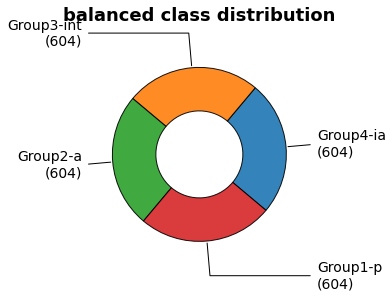

In [24]:
# EDA for Y_res

fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(aspect="equal"))

bioactivity_class_value = Y_res.value_counts()
bioactivity_class_label = [i.capitalize() for i in Y_res.value_counts().index]

wedges, texts = ax.pie(bioactivity_class_value, wedgeprops=dict(width=0.5, alpha = 0.9, edgecolor='black'), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="w", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(f'{bioactivity_class_label[i]}\n({bioactivity_class_value[i]})', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw, 
                fontsize = 14)

ax.set_title("balanced class distribution", fontweight='bold', fontsize = 18, pad=25)

plt.show()

### **4. Modeling and validation**

**4.1 Data splitting**

In [25]:
#split dataset into training set and test set by 80/20 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size=0.2, random_state=42)

In [26]:
X_train.shape, X_test.shape

((1932, 145), (484, 145))

In [27]:
Y_train.shape, Y_test.shape

((1932,), (484,))

In [28]:
X_test 

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,...,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP840,PubchemFP860
410,0,1,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
199,1,1,1,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
1670,1,1,0,0,0,1,1,0,0,0,...,0,0,1,0,1,0,1,0,1,1
1934,1,1,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1036,1,1,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,0,1,1,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1458,1,1,1,1,0,1,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
281,1,1,1,1,1,1,0,1,1,0,...,0,0,0,1,0,1,1,0,0,0
1804,0,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
Y_train

1666      group2-a
1563     group4-ia
544     group3-int
1025      group1-p
821      group4-ia
           ...    
1638      group1-p
1095      group2-a
1130    group3-int
1294     group4-ia
860      group4-ia
Name: bioactivity, Length: 1932, dtype: object

**4.2 Modeling**

**ET**

In [30]:
et = ExtraTreesClassifier(n_estimators=500, random_state=42)

# fit model
et.fit(X_train, Y_train)

# make predictions
Y_train_pred = et.predict(X_train)
Y_test_pred = et.predict(X_test)

#cross-validation
cv_scoring = {'acc': 'accuracy', 'rec': make_scorer(recall_score,average='weighted'), 'f1': make_scorer(f1_score, average='weighted'), 'MCC': make_scorer(matthews_corrcoef)}
clf_cv = et
cv = cross_validate(clf_cv, X_train, Y_train, cv=10, scoring=cv_scoring)

  # Calculating model performance
acc_train = accuracy_score(Y_train, Y_train_pred)
acc_test = accuracy_score(Y_test, Y_test_pred)
acc_cv = cv['test_acc'].mean()

rec_train = recall_score(Y_train, Y_train_pred, average='weighted')
rec_test = recall_score(Y_test, Y_test_pred, average='weighted')
rec_cv = cv['test_rec'].mean()

f1_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_cv = cv['test_f1'].mean()

mcc_train = matthews_corrcoef(Y_train, Y_train_pred)
mcc_test = matthews_corrcoef(Y_test, Y_test_pred)
mcc_cv = cv['test_MCC'].mean()
  
  # Preparing performance summary table
model_name = pd.Series([et], name='Algorithm')

acc_train_series = pd.Series(acc_train, name='acc_train')
acc_test_series = pd.Series(acc_test, name='acc_test')
acc_cv_series = pd.Series(acc_cv, name='acc_cv')

rec_train_series = pd.Series(rec_train, name='rec_train')
rec_test_series = pd.Series(rec_test, name='rec_test')
rec_cv_series = pd.Series(rec_cv, name='rec_cv')

f1_train_series = pd.Series(f1_train, name='f1_train')
f1_test_series = pd.Series(f1_test, name='f1_test')
f1_cv_series = pd.Series(f1_cv, name='f1_cv')

mcc_train_series = pd.Series(mcc_train, name='MCC_train')
mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics = pd.concat([model_name,
                                   acc_train_series, acc_cv_series, acc_test_series,
                                   rec_train_series, rec_cv_series, rec_test_series,
                                   f1_train_series, f1_cv_series, f1_test_series,
                                   mcc_train_series, mcc_cv_series, mcc_test_series], axis=1)

performance_metrics['acc_train-cv'] = abs(performance_metrics['acc_train'] - performance_metrics['acc_cv'])
performance_metrics['acc_train-test'] = abs(performance_metrics['acc_train'] - performance_metrics['acc_test'])

performance_metrics['rec_train-cv'] = abs(performance_metrics['rec_train'] - performance_metrics['rec_cv'])
performance_metrics['rec_train-test'] = abs(performance_metrics['rec_train'] - performance_metrics['rec_test'])

performance_metrics['f1_train-cv'] = abs(performance_metrics['f1_train'] - performance_metrics['f1_cv'])
performance_metrics['f1_train-test'] = abs(performance_metrics['f1_train'] - performance_metrics['f1_test'])

performance_metrics['MCC_train-cv'] = abs(performance_metrics['MCC_train'] - performance_metrics['MCC_cv'])
performance_metrics['MCC_train-test'] = abs(performance_metrics['MCC_train'] - performance_metrics['MCC_test'])

performance_metrics

df_et = performance_metrics
df_et

,Algorithm,acc_train,acc_cv,acc_test,rec_train,rec_cv,rec_test,f1_train,f1_cv,f1_test,...,MCC_cv,MCC_test,acc_train-cv,acc_train-test,rec_train-cv,rec_train-test,f1_train-cv,f1_train-test,MCC_train-cv,MCC_train-test
0,"(ExtraTreeClassifier(random_state=1608637542),...",0.9353,0.734977,0.756198,0.9353,0.734977,0.756198,0.935109,0.728915,0.751591,...,0.648477,0.677686,0.200323,0.179102,0.200323,0.179102,0.206194,0.183519,0.265732,0.236522


**RF**

In [31]:
rf = RandomForestClassifier(max_features=3, n_estimators=500,criterion='gini', random_state=42)

# fit model
rf.fit(X_train, Y_train)

# make predictions
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)

#cross-validation
cv_scoring = {'acc': 'accuracy', 'rec': make_scorer(recall_score,average='weighted'), 'f1': make_scorer(f1_score, average='weighted'), 'MCC': make_scorer(matthews_corrcoef)}
clf_cv = rf
cv = cross_validate(clf_cv, X_train, Y_train, cv=10, scoring=cv_scoring)

  # Calculating model performance
acc_train = accuracy_score(Y_train, Y_train_pred)
acc_test = accuracy_score(Y_test, Y_test_pred)
acc_cv = cv['test_acc'].mean()

rec_train = recall_score(Y_train, Y_train_pred, average='weighted')
rec_test = recall_score(Y_test, Y_test_pred, average='weighted')
rec_cv = cv['test_rec'].mean()

f1_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_cv = cv['test_f1'].mean()

mcc_train = matthews_corrcoef(Y_train, Y_train_pred)
mcc_test = matthews_corrcoef(Y_test, Y_test_pred)
mcc_cv = cv['test_MCC'].mean()
  
  # Preparing performance summary table
model_name = pd.Series([rf], name='Algorithm')

acc_train_series = pd.Series(acc_train, name='acc_train')
acc_test_series = pd.Series(acc_test, name='acc_test')
acc_cv_series = pd.Series(acc_cv, name='acc_cv')

rec_train_series = pd.Series(rec_train, name='rec_train')
rec_test_series = pd.Series(rec_test, name='rec_test')
rec_cv_series = pd.Series(rec_cv, name='rec_cv')

f1_train_series = pd.Series(f1_train, name='f1_train')
f1_test_series = pd.Series(f1_test, name='f1_test')
f1_cv_series = pd.Series(f1_cv, name='f1_cv')

mcc_train_series = pd.Series(mcc_train, name='MCC_train')
mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics = pd.concat([model_name,
                                   acc_train_series, acc_cv_series, acc_test_series,
                                   rec_train_series, rec_cv_series, rec_test_series,
                                   f1_train_series, f1_cv_series, f1_test_series,
                                   mcc_train_series, mcc_cv_series, mcc_test_series], axis=1)

performance_metrics['acc_train-cv'] = abs(performance_metrics['acc_train'] - performance_metrics['acc_cv'])
performance_metrics['acc_train-test'] = abs(performance_metrics['acc_train'] - performance_metrics['acc_test'])

performance_metrics['rec_train-cv'] = abs(performance_metrics['rec_train'] - performance_metrics['rec_cv'])
performance_metrics['rec_train-test'] = abs(performance_metrics['rec_train'] - performance_metrics['rec_test'])

performance_metrics['f1_train-cv'] = abs(performance_metrics['f1_train'] - performance_metrics['f1_cv'])
performance_metrics['f1_train-test'] = abs(performance_metrics['f1_train'] - performance_metrics['f1_test'])

performance_metrics['MCC_train-cv'] = abs(performance_metrics['MCC_train'] - performance_metrics['MCC_cv'])
performance_metrics['MCC_train-test'] = abs(performance_metrics['MCC_train'] - performance_metrics['MCC_test'])

performance_metrics

df_rf = performance_metrics
df_rf

,Algorithm,acc_train,acc_cv,acc_test,rec_train,rec_cv,rec_test,f1_train,f1_cv,f1_test,...,MCC_cv,MCC_test,acc_train-cv,acc_train-test,rec_train-cv,rec_train-test,f1_train-cv,f1_train-test,MCC_train-cv,MCC_train-test
0,"(DecisionTreeClassifier(max_features=3, random...",0.9353,0.731865,0.741736,0.9353,0.731865,0.741736,0.935136,0.724981,0.735948,...,0.644602,0.658882,0.203435,0.193565,0.203435,0.193565,0.210155,0.199189,0.269373,0.255093


**XGB**

In [32]:
xgb = XGBClassifier(n_estimators=500, random_state=42)

# fit model
xgb.fit(X_train, Y_train)

# make predictions
Y_train_pred = xgb.predict(X_train)
Y_test_pred = xgb.predict(X_test)

#cross-validation
cv_scoring = {'acc': 'accuracy', 'rec': make_scorer(recall_score,average='weighted'), 'f1': make_scorer(f1_score, average='weighted'), 'MCC': make_scorer(matthews_corrcoef)}
clf_cv = xgb
cv = cross_validate(clf_cv, X_train, Y_train, cv=10, scoring=cv_scoring)

  # Calculating model performance
acc_train = accuracy_score(Y_train, Y_train_pred)
acc_test = accuracy_score(Y_test, Y_test_pred)
acc_cv = cv['test_acc'].mean()

rec_train = recall_score(Y_train, Y_train_pred, average='weighted')
rec_test = recall_score(Y_test, Y_test_pred, average='weighted')
rec_cv = cv['test_rec'].mean()

f1_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_cv = cv['test_f1'].mean()

mcc_train = matthews_corrcoef(Y_train, Y_train_pred)
mcc_test = matthews_corrcoef(Y_test, Y_test_pred)
mcc_cv = cv['test_MCC'].mean()
  
  # Preparing performance summary table
model_name = pd.Series([xgb], name='Algorithm')

acc_train_series = pd.Series(acc_train, name='acc_train')
acc_test_series = pd.Series(acc_test, name='acc_test')
acc_cv_series = pd.Series(acc_cv, name='acc_cv')

rec_train_series = pd.Series(rec_train, name='rec_train')
rec_test_series = pd.Series(rec_test, name='rec_test')
rec_cv_series = pd.Series(rec_cv, name='rec_cv')

f1_train_series = pd.Series(f1_train, name='f1_train')
f1_test_series = pd.Series(f1_test, name='f1_test')
f1_cv_series = pd.Series(f1_cv, name='f1_cv')

mcc_train_series = pd.Series(mcc_train, name='MCC_train')
mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics = pd.concat([model_name,
                                   acc_train_series, acc_cv_series, acc_test_series,
                                   rec_train_series, rec_cv_series, rec_test_series,
                                   f1_train_series, f1_cv_series, f1_test_series,
                                   mcc_train_series, mcc_cv_series, mcc_test_series], axis=1)

performance_metrics['acc_train-cv'] = abs(performance_metrics['acc_train'] - performance_metrics['acc_cv'])
performance_metrics['acc_train-test'] = abs(performance_metrics['acc_train'] - performance_metrics['acc_test'])

performance_metrics['rec_train-cv'] = abs(performance_metrics['rec_train'] - performance_metrics['rec_cv'])
performance_metrics['rec_train-test'] = abs(performance_metrics['rec_train'] - performance_metrics['rec_test'])

performance_metrics['f1_train-cv'] = abs(performance_metrics['f1_train'] - performance_metrics['f1_cv'])
performance_metrics['f1_train-test'] = abs(performance_metrics['f1_train'] - performance_metrics['f1_test'])

performance_metrics['MCC_train-cv'] = abs(performance_metrics['MCC_train'] - performance_metrics['MCC_cv'])
performance_metrics['MCC_train-test'] = abs(performance_metrics['MCC_train'] - performance_metrics['MCC_test'])

performance_metrics

df_xgb = performance_metrics
df_xgb

,Algorithm,acc_train,acc_cv,acc_test,rec_train,rec_cv,rec_test,f1_train,f1_cv,f1_test,...,MCC_cv,MCC_test,acc_train-cv,acc_train-test,rec_train-cv,rec_train-test,f1_train-cv,f1_train-test,MCC_train-cv,MCC_train-test
0,"XGBClassifier(n_estimators=500, objective='mul...",0.862319,0.712681,0.729339,0.862319,0.712681,0.729339,0.861373,0.706056,0.726099,...,0.618703,0.641904,0.149638,0.13298,0.149638,0.13298,0.155317,0.135274,0.198221,0.175019


**Gaussian Process**

In [33]:
gp = GaussianProcessClassifier(random_state=42)

# fit model
gp.fit(X_train, Y_train)

# make predictions
Y_train_pred = gp.predict(X_train)
Y_test_pred = gp.predict(X_test)

#cross-validation
cv_scoring = {'acc': 'accuracy', 'rec': make_scorer(recall_score,average='weighted'), 'f1': make_scorer(f1_score, average='weighted'), 'MCC': make_scorer(matthews_corrcoef)}
clf_cv = gp
cv = cross_validate(clf_cv, X_train, Y_train, cv=10, scoring=cv_scoring)

  # Calculating model performance
acc_train = accuracy_score(Y_train, Y_train_pred)
acc_test = accuracy_score(Y_test, Y_test_pred)
acc_cv = cv['test_acc'].mean()

rec_train = recall_score(Y_train, Y_train_pred, average='weighted')
rec_test = recall_score(Y_test, Y_test_pred, average='weighted')
rec_cv = cv['test_rec'].mean()

f1_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_cv = cv['test_f1'].mean()

mcc_train = matthews_corrcoef(Y_train, Y_train_pred)
mcc_test = matthews_corrcoef(Y_test, Y_test_pred)
mcc_cv = cv['test_MCC'].mean()
  
  # Preparing performance summary table
model_name = pd.Series([gp], name='Algorithm')

acc_train_series = pd.Series(acc_train, name='acc_train')
acc_test_series = pd.Series(acc_test, name='acc_test')
acc_cv_series = pd.Series(acc_cv, name='acc_cv')

rec_train_series = pd.Series(rec_train, name='rec_train')
rec_test_series = pd.Series(rec_test, name='rec_test')
rec_cv_series = pd.Series(rec_cv, name='rec_cv')

f1_train_series = pd.Series(f1_train, name='f1_train')
f1_test_series = pd.Series(f1_test, name='f1_test')
f1_cv_series = pd.Series(f1_cv, name='f1_cv')

mcc_train_series = pd.Series(mcc_train, name='MCC_train')
mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics = pd.concat([model_name,
                                   acc_train_series, acc_cv_series, acc_test_series,
                                   rec_train_series, rec_cv_series, rec_test_series,
                                   f1_train_series, f1_cv_series, f1_test_series,
                                   mcc_train_series, mcc_cv_series, mcc_test_series], axis=1)

performance_metrics['acc_train-cv'] = abs(performance_metrics['acc_train'] - performance_metrics['acc_cv'])
performance_metrics['acc_train-test'] = abs(performance_metrics['acc_train'] - performance_metrics['acc_test'])

performance_metrics['rec_train-cv'] = abs(performance_metrics['rec_train'] - performance_metrics['rec_cv'])
performance_metrics['rec_train-test'] = abs(performance_metrics['rec_train'] - performance_metrics['rec_test'])

performance_metrics['f1_train-cv'] = abs(performance_metrics['f1_train'] - performance_metrics['f1_cv'])
performance_metrics['f1_train-test'] = abs(performance_metrics['f1_train'] - performance_metrics['f1_test'])

performance_metrics['MCC_train-cv'] = abs(performance_metrics['MCC_train'] - performance_metrics['MCC_cv'])
performance_metrics['MCC_train-test'] = abs(performance_metrics['MCC_train'] - performance_metrics['MCC_test'])

performance_metrics

df_gp = performance_metrics
df_gp

,Algorithm,acc_train,acc_cv,acc_test,rec_train,rec_cv,rec_test,f1_train,f1_cv,f1_test,...,MCC_cv,MCC_test,acc_train-cv,acc_train-test,rec_train-cv,rec_train-test,f1_train-cv,f1_train-test,MCC_train-cv,MCC_train-test
0,GaussianProcessClassifier(random_state=42),0.921325,0.711674,0.733471,0.921325,0.711674,0.733471,0.921,0.703811,0.727334,...,0.617935,0.649318,0.209651,0.187854,0.209651,0.187854,0.217189,0.193666,0.277578,0.246195


**MLP**

In [34]:
mlp = MLPClassifier(hidden_layer_sizes=100,random_state=42)

# define the ovr strategy
mlp1 = OneVsRestClassifier(mlp)

# fit model
mlp1.fit(X_train, Y_train)

# make predictions
Y_train_pred = mlp1.predict(X_train)
Y_test_pred = mlp1.predict(X_test)

#cross-validation
cv_scoring = {'acc': 'accuracy', 'rec': make_scorer(recall_score,average='weighted'), 'f1': make_scorer(f1_score, average='weighted'), 'MCC': make_scorer(matthews_corrcoef)}
clf_cv = mlp1
cv = cross_validate(clf_cv, X_train, Y_train, cv=10, scoring=cv_scoring)

# Calculating model performance
acc_train = accuracy_score(Y_train, Y_train_pred)
acc_test = accuracy_score(Y_test, Y_test_pred)
acc_cv = cv['test_acc'].mean()

rec_train = recall_score(Y_train, Y_train_pred, average='weighted')
rec_test = recall_score(Y_test, Y_test_pred, average='weighted')
rec_cv = cv['test_rec'].mean()

f1_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_cv = cv['test_f1'].mean()

mcc_train = matthews_corrcoef(Y_train, Y_train_pred)
mcc_test = matthews_corrcoef(Y_test, Y_test_pred)
mcc_cv = cv['test_MCC'].mean()
  
  # Preparing performance summary table
model_name = pd.Series([mlp1], name='Algorithm')

acc_train_series = pd.Series(acc_train, name='acc_train')
acc_test_series = pd.Series(acc_test, name='acc_test')
acc_cv_series = pd.Series(acc_cv, name='acc_cv')

rec_train_series = pd.Series(rec_train, name='rec_train')
rec_test_series = pd.Series(rec_test, name='rec_test')
rec_cv_series = pd.Series(rec_cv, name='rec_cv')

f1_train_series = pd.Series(f1_train, name='f1_train')
f1_test_series = pd.Series(f1_test, name='f1_test')
f1_cv_series = pd.Series(f1_cv, name='f1_cv')

mcc_train_series = pd.Series(mcc_train, name='MCC_train')
mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics = pd.concat([model_name,
                                   acc_train_series, acc_cv_series, acc_test_series,
                                   rec_train_series, rec_cv_series, rec_test_series,
                                   f1_train_series, f1_cv_series, f1_test_series,
                                   mcc_train_series, mcc_cv_series, mcc_test_series], axis=1)

performance_metrics['acc_train-cv'] = abs(performance_metrics['acc_train'] - performance_metrics['acc_cv'])
performance_metrics['acc_train-test'] = abs(performance_metrics['acc_train'] - performance_metrics['acc_test'])

performance_metrics['rec_train-cv'] = abs(performance_metrics['rec_train'] - performance_metrics['rec_cv'])
performance_metrics['rec_train-test'] = abs(performance_metrics['rec_train'] - performance_metrics['rec_test'])

performance_metrics['f1_train-cv'] = abs(performance_metrics['f1_train'] - performance_metrics['f1_cv'])
performance_metrics['f1_train-test'] = abs(performance_metrics['f1_train'] - performance_metrics['f1_test'])

performance_metrics['MCC_train-cv'] = abs(performance_metrics['MCC_train'] - performance_metrics['MCC_cv'])
performance_metrics['MCC_train-test'] = abs(performance_metrics['MCC_train'] - performance_metrics['MCC_test'])

performance_metrics

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

,Algorithm,acc_train,acc_cv,acc_test,rec_train,rec_cv,rec_test,f1_train,f1_cv,f1_test,...,MCC_cv,MCC_test,acc_train-cv,acc_train-test,rec_train-cv,rec_train-test,f1_train-cv,f1_train-test,MCC_train-cv,MCC_train-test
0,OneVsRestClassifier(estimator=MLPClassifier(hi...,0.92236,0.719943,0.733471,0.92236,0.719943,0.733471,0.922423,0.71374,0.732116,...,0.628389,0.647897,0.202417,0.188889,0.202417,0.188889,0.208683,0.190307,0.268277,0.248769


## **5. Application of the model**

In [35]:
df2 = pd.read_csv('https://raw.githubusercontent.com/GitGears/AR/main/enumeration-70.csv')
df2

,SMILES,ID
0,CC1CCC2C=C3C(=CC2N1)N=C(F)C=C3C(F)(F)F,novel-01
1,CCC1CCC2C=C3C(=CC2N1)N=C(C=C3C(F)(F)F)C#N,novel-02
2,CC1NC2C=C3N=C(C=C(C3=CC2C(C)C1C)C(F)(F)F)C#N,novel-03
3,CC1CCC2C=C3C(=CC2N1)N=C(C=C3C(F)(F)F)C#N,novel-04
4,CCC1C(C)C(C)NC2C=C3N=C(C=C(C3=CC12)C(F)(F)F)C#N,novel-05
...,...,...
65,C[C@](O)(COc1ccc(cc1I)C#N)C(=O)N1CCc2c1cccc2C#N,novel-66
66,C[C@](O)(COc1ccc(cc1C#N)C#N)C(=O)N1CCc2c1cccc2C#N,novel-67
67,C[C@](O)(COc1ccc(Cl)cc1Br)C(=O)N1CCc2c1cccc2C#N,novel-68
68,C[C@](O)(COc1ccc(cc1Br)C(F)(F)F)C(=O)N1CCc2c1c...,novel-69


In [36]:
df3 = pd.concat( [df2['SMILES'],df2['ID']], axis=1 )
df3.to_csv('molecule.smi', sep='\t', index=False, header=False)
df3

,SMILES,ID
0,CC1CCC2C=C3C(=CC2N1)N=C(F)C=C3C(F)(F)F,novel-01
1,CCC1CCC2C=C3C(=CC2N1)N=C(C=C3C(F)(F)F)C#N,novel-02
2,CC1NC2C=C3N=C(C=C(C3=CC2C(C)C1C)C(F)(F)F)C#N,novel-03
3,CC1CCC2C=C3C(=CC2N1)N=C(C=C3C(F)(F)F)C#N,novel-04
4,CCC1C(C)C(C)NC2C=C3N=C(C=C(C3=CC12)C(F)(F)F)C#N,novel-05
...,...,...
65,C[C@](O)(COc1ccc(cc1I)C#N)C(=O)N1CCc2c1cccc2C#N,novel-66
66,C[C@](O)(COc1ccc(cc1C#N)C#N)C(=O)N1CCc2c1cccc2C#N,novel-67
67,C[C@](O)(COc1ccc(Cl)cc1Br)C(=O)N1CCc2c1cccc2C#N,novel-68
68,C[C@](O)(COc1ccc(cc1Br)C(F)(F)F)C(=O)N1CCc2c1c...,novel-69


In [37]:
#Preparing for same set of fingerprint

from padelpy import padeldescriptor

fingerprint = 'PubChem'

fingerprint_output_file = ''.join([fingerprint,'.csv']) 
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file, 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [38]:
input = pd.read_csv(fingerprint_output_file)
df4 = input.sort_values(by='Name',ascending=True)
df4

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,novel-01,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,novel-02,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,novel-03,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,novel-04,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,novel-05,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,novel-66,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,novel-67,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,novel-68,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,novel-69,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X_input = df4.drop('Name', axis=1)
X_input

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
66,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
67,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
68,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
merge = pd.concat([df4, X_corr.head(3)],axis=0)
merge

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,novel-01,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,novel-02,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,novel-03,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,novel-04,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,novel-05,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,novel-69,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,novel-70,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df5=merge.dropna(axis=1).head(70)
df5

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,...,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP840,PubchemFP860
0,0,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1,1,1,1,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
66,1,1,1,1,1,1,0,0,0,0,...,1,1,0,1,1,0,1,1,0,0
67,1,1,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
68,1,1,1,1,0,1,0,1,1,0,...,0,1,0,1,0,0,1,0,0,0


In [42]:
Y_output1 = et.predict_proba(df5)
df6=pd.DataFrame(Y_output1)
df6

,0,1,2,3
0,0.084000,0.395000,0.160467,0.360533
1,0.162000,0.244267,0.286667,0.307067
2,0.174000,0.233267,0.274533,0.318200
3,0.162000,0.295000,0.177867,0.365133
4,0.174000,0.233267,0.274533,0.318200
...,...,...,...,...
65,0.750000,0.250000,0.000000,0.000000
66,0.255278,0.609700,0.064622,0.070400
67,0.500000,0.250000,0.250000,0.000000
68,0.000000,1.000000,0.000000,0.000000


In [43]:
# et prediction
Y_output2 = et.predict(df5)
df6_et=pd.DataFrame(Y_output2)
df6_et

,0
0,group2-a
1,group4-ia
2,group4-ia
3,group4-ia
4,group4-ia
...,...
65,group1-p
66,group2-a
67,group1-p
68,group2-a


In [44]:
# rf prediction
Y_output2 = rf.predict(df5)
df6_rf=pd.DataFrame(Y_output2)
df6_rf

,0
0,group4-ia
1,group3-int
2,group4-ia
3,group2-a
4,group4-ia
...,...
65,group1-p
66,group2-a
67,group1-p
68,group2-a


In [45]:
# xgb prediction
Y_output2 = xgb.predict(df5)
df6_xgb=pd.DataFrame(Y_output2)
df6_et

,0
0,group2-a
1,group4-ia
2,group4-ia
3,group4-ia
4,group4-ia
...,...
65,group1-p
66,group2-a
67,group1-p
68,group2-a


In [46]:
# mlp prediction
Y_output2 = mlp1.predict(df5)
df6_mlp=pd.DataFrame(Y_output2)
df6_mlp

,0
0,group4-ia
1,group2-a
2,group2-a
3,group2-a
4,group2-a
...,...
65,group1-p
66,group1-p
67,group1-p
68,group2-a


In [47]:
# gp prediction
Y_output2 = gp.predict(df5)
df6_gp=pd.DataFrame(Y_output2)
df6_gp

,0
0,group4-ia
1,group4-ia
2,group4-ia
3,group4-ia
4,group4-ia
...,...
65,group1-p
66,group1-p
67,group1-p
68,group2-a


In [48]:
df_concensus = pd.concat([df6_et,df6_rf,df6_xgb,df6_mlp,df6_gp],axis=1)
df_concensus.to_csv('AR-consensus.csv')
df_concensus

,0,0,0,0,0
0,group2-a,group4-ia,group2-a,group4-ia,group4-ia
1,group4-ia,group3-int,group1-p,group2-a,group4-ia
2,group4-ia,group4-ia,group2-a,group2-a,group4-ia
3,group4-ia,group2-a,group2-a,group2-a,group4-ia
4,group4-ia,group4-ia,group2-a,group2-a,group4-ia
...,...,...,...,...,...
65,group1-p,group1-p,group1-p,group1-p,group1-p
66,group2-a,group2-a,group1-p,group1-p,group1-p
67,group1-p,group1-p,group1-p,group1-p,group1-p
68,group2-a,group2-a,group1-p,group2-a,group2-a
